## HOUSE PRICES SOLUTION - PART I EXPLORATORY DATA ANALYSIS
>* Data cleaning
* Encoding, feature engineering
* Analysis of distribution, encoding and consolidation of data for modeling

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
from pandas.tseries.offsets import *
import seaborn as sns
import re
from sklearn.preprocessing import Normalizer
import sqlite3
import os
from sklearn.linear_model import SGDRegressor
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import HuberRegressor
from scipy.linalg import lstsq # multiple linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats

from sklearn import datasets, linear_model
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import QuantileTransformer
from sklearn.cluster import KMeans

import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
pd.set_option('mode.chained_assignment', None)

In [2]:
# Load data
houseprices = pd.read_csv('house-prices.csv')

In [3]:
# display all columns
pd.set_option('display.max_columns', None)

In [4]:
# Add a LogSalePrice variable to the DataFrame
houseprices['LogSalePrice'] = np.log10(houseprices['SalePrice'])

In [5]:
houseprices.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,LogSalePrice
0,484,528275070,60,RL,NaN,8795,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,300.0,Unf,0.0,652.0,952.0,GasA,Ex,Y,SBrkr,980,1276,0,2256,0.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,BuiltIn,2000.0,Fin,2.0,554.0,TA,TA,Y,224,54,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,236000,5.372912
1,2586,535305120,20,RL,75.0,10170,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1951,1951,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,522.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,216.0,216.0,GasA,TA,Y,SBrkr,1575,0,0,1575,0.0,0.0,1,1,2,1,Gd,5,Typ,1,Gd,Attchd,1951.0,Unf,2.0,400.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,155000,5.190332
2,2289,923228250,160,RM,21.0,2001,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,BrkFace,80.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Fa,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1970.0,Unf,1.0,286.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,75000,4.875061
3,142,535152150,20,RL,70.0,10552,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,1018.0,Unf,0.0,380.0,1398.0,GasA,Gd,Y,SBrkr,1700,0,0,1700,0.0,1.0,1,1,4,1,Gd,6,Typ,1,Gd,Attchd,1959.0,RFn,2.0,447.0,TA,TA,Y,0,38,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,165500,5.218798
4,2042,903475060,190,RM,60.0,10120,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,OldTown,Feedr,Norm,2fmCon,2.5Unf,7,4,1910,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,925.0,925.0,GasA,TA,N,FuseF,964,925,0,1889,0.0,0.0,1,1,4,2,TA,9,Typ,1,Gd,Detchd,1960.0,Unf,1.0,308.0,TA,TA,N,0,0,264,0,0,0,NaN,MnPrv,NaN,0,1,2007,WD,Normal,122000,5.086360


## Data Cleaning
> * **Step 1 Address NaN and dealing with duplicates** IMPORTANT FOR PREPROCESSING TEST DATA
* **Step 2 Detecting and addressing outliers** NOT TO BE INCLUDED IN THE PREPROCESSING OF TEST DATA

#### STEP 1: Data Cleaning - Address NaN: Key highlights (supported by the code below)
>* Remove columns with a large majority of Nan (i.e +1,900 PID, out of 2,430). 4 columns will be be removed: Alley, PoolQC, Fence, Misc Feature
* Replace Nan values by median for numeric variables
* Replace NaN values by a unique label ('tagada') for all categorical based features

In [6]:
# Check data structure
houseprices.shape

(2430, 83)

#### Step 1a Check NaN values per column

In [7]:
houseprices.isnull().sum() # PID do not have missing values. There is no issue with the integrity of unique house identifier.

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      420
                 ... 
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
LogSalePrice        0
Length: 83, dtype: int64

#### Step 1b Remove variables which do not have value at all

In [8]:
df1=houseprices.dropna(how='all', axis=1)
df1.shape # 2430 rows (no change); 83 columns (no change). There is none.

(2430, 83)

#### Step 1c Remove columns which would have a large majority of NaN. Threshold defined at 1900 NaN per variable

In [9]:
# Create a special dataframe without columns having NaN >= 1900
hp1=houseprices.dropna(thresh=len(houseprices) - 1900, axis=1)
hp1.shape # 4 columns have been removed: Alley, PoolQC, Fence, Misc Feature

(2430, 79)

#### Step 1d Replace NaN in 'Lot Frontage' column by the median of the given column
* Features: Lot Frontage (420 missing values)

In [10]:
hp1['Lot Frontage'].replace(np.NaN, hp1['Lot Frontage'].median(), inplace=True)

#### Step 1e Convert Garage Yr Blt into a categorical feature with 10 classes

In [11]:
hp1['Garage Modernity'] = pd.qcut(hp1['Garage Yr Blt'], q=10).cat.codes

In [12]:
hp1.drop('Garage Yr Blt', axis=1, inplace=True)

In [13]:
hp1.shape

(2430, 79)

#### Step 1f Replace NaN in each columns with float data type by the median of the given column

In [14]:
# select the float columns
hp1_float = hp1.select_dtypes(include=[np.float64])
# replace NaN values by median
hp1_float.replace(np.NaN, hp1_float.median(), inplace=True)
hp1_float.head()

,Lot Frontage,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Garage Cars,Garage Area,LogSalePrice
0,68.0,0.0,300.0,0.0,652.0,952.0,0.0,0.0,2.0,554.0,5.372912
1,75.0,522.0,0.0,0.0,216.0,216.0,0.0,0.0,2.0,400.0,5.190332
2,21.0,80.0,0.0,0.0,546.0,546.0,0.0,0.0,1.0,286.0,4.875061
3,70.0,0.0,1018.0,0.0,380.0,1398.0,0.0,1.0,2.0,447.0,5.218798
4,60.0,0.0,0.0,0.0,925.0,925.0,0.0,0.0,1.0,308.0,5.086360


#### Step 1g Replace NaN in each columns with integer data type by the median of the given column

In [15]:
# select the integer columns
hp1_int = hp1.select_dtypes(include=[np.int64, np.int8])
# replace NaN values by median
hp1_int.replace(np.NaN, hp1_int.median(), inplace=True)
hp1_int.head()

,Order,PID,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,Garage Modernity
0,484,528275070,60,8795,7,5,2000,2000,980,1276,0,2256,2,1,4,1,8,1,224,54,0,0,0,0,0,4,2009,236000,7
1,2586,535305120,20,10170,6,6,1951,1951,1575,0,0,1575,1,1,2,1,5,1,0,0,0,0,0,0,0,6,2006,155000,1
2,2289,923228250,160,2001,4,5,1970,1970,546,546,0,1092,1,1,3,1,6,0,0,0,0,0,0,0,0,1,2007,75000,3
3,142,535152150,20,10552,5,5,1959,1959,1700,0,0,1700,1,1,4,1,6,1,0,38,0,0,0,0,0,4,2010,165500,2
4,2042,903475060,190,10120,7,4,1910,1950,964,925,0,1889,1,1,4,2,9,1,0,0,264,0,0,0,0,1,2007,122000,2


#### Step 1h Replace NaN in each columns with object data type by a "fake class" named 'tagada' (except Bsmt Qual)

In [16]:
# select the object columns
hp1_obj = hp1.select_dtypes(exclude=[np.number])

In [17]:
# Replace NaN by No in Bsmt Qual to acknowledge that some houses do not have basement
hp1_obj['Bsmt Qual'].replace(np.NaN, 'No', inplace=True)

In [18]:
# Replace NaN by "fake class" tagada
hp1_obj.fillna('tagada', inplace=True)
hp1_obj.shape

(2430, 39)

#### Step 1i a dataframe 'hp_noNaN' with all columns merged without NaN

In [19]:
# merge float and integer data types columns into 'hp_noNaN_num'
hp_noNaN_num=pd.merge(hp1_int,hp1_float, right_index=True, left_index=True)
hp_noNaN_num.shape

(2430, 40)

In [20]:
# merge hp_noNaN_num with dataframe containing object data type; new consolidated dataframe named: hp_noNaN
hp_noNaN=pd.merge(hp_noNaN_num,hp1_obj, right_index=True, left_index=True)
hp_noNaN.shape

(2430, 79)

In [21]:
# re-order the columns of the dataframe
hp_noNaN = hp_noNaN.reindex(sorted(hp_noNaN.columns), axis=1)

#### Data Cleaning - Dealing with duplicates
>* Check duplicates for the unique house identifier 'Order' and 'PID': No duplicate

In [22]:
# Check if there are duplicate for the feature 'Order'
codedup = hp_noNaN['Order']
hp_noNaN[codedup.isin(codedup[codedup.duplicated()])]
# There is no duplicate in the column 'Order'

,1st Flr SF,2nd Flr SF,3Ssn Porch,Bedroom AbvGr,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Condition 1,Condition 2,Electrical,Enclosed Porch,Exter Cond,Exter Qual,Exterior 1st,Exterior 2nd,Fireplace Qu,Fireplaces,Foundation,Full Bath,Functional,Garage Area,Garage Cars,Garage Cond,Garage Finish,Garage Modernity,Garage Qual,Garage Type,Gr Liv Area,Half Bath,Heating,Heating QC,House Style,Kitchen AbvGr,Kitchen Qual,Land Contour,Land Slope,LogSalePrice,Lot Area,Lot Config,Lot Frontage,Lot Shape,Low Qual Fin SF,MS SubClass,MS Zoning,Mas Vnr Area,Mas Vnr Type,Misc Val,Mo Sold,Neighborhood,Open Porch SF,Order,Overall Cond,Overall Qual,PID,Paved Drive,Pool Area,Roof Matl,Roof Style,Sale Condition,Sale Type,SalePrice,Screen Porch,Street,TotRms AbvGrd,Total Bsmt SF,Utilities,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold


In [23]:
# Check if there are duplicate for the feature 'PID'
codedup = hp_noNaN['PID']
hp_noNaN[codedup.isin(codedup[codedup.duplicated()])]
# There is no duplicate in the column 'PID'

,1st Flr SF,2nd Flr SF,3Ssn Porch,Bedroom AbvGr,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Condition 1,Condition 2,Electrical,Enclosed Porch,Exter Cond,Exter Qual,Exterior 1st,Exterior 2nd,Fireplace Qu,Fireplaces,Foundation,Full Bath,Functional,Garage Area,Garage Cars,Garage Cond,Garage Finish,Garage Modernity,Garage Qual,Garage Type,Gr Liv Area,Half Bath,Heating,Heating QC,House Style,Kitchen AbvGr,Kitchen Qual,Land Contour,Land Slope,LogSalePrice,Lot Area,Lot Config,Lot Frontage,Lot Shape,Low Qual Fin SF,MS SubClass,MS Zoning,Mas Vnr Area,Mas Vnr Type,Misc Val,Mo Sold,Neighborhood,Open Porch SF,Order,Overall Cond,Overall Qual,PID,Paved Drive,Pool Area,Roof Matl,Roof Style,Sale Condition,Sale Type,SalePrice,Screen Porch,Street,TotRms AbvGrd,Total Bsmt SF,Utilities,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold


In [24]:
hp_noNaN.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Bedroom AbvGr,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Condition 1,Condition 2,Electrical,Enclosed Porch,Exter Cond,Exter Qual,Exterior 1st,Exterior 2nd,Fireplace Qu,Fireplaces,Foundation,Full Bath,Functional,Garage Area,Garage Cars,Garage Cond,Garage Finish,Garage Modernity,Garage Qual,Garage Type,Gr Liv Area,Half Bath,Heating,Heating QC,House Style,Kitchen AbvGr,Kitchen Qual,Land Contour,Land Slope,LogSalePrice,Lot Area,Lot Config,Lot Frontage,Lot Shape,Low Qual Fin SF,MS SubClass,MS Zoning,Mas Vnr Area,Mas Vnr Type,Misc Val,Mo Sold,Neighborhood,Open Porch SF,Order,Overall Cond,Overall Qual,PID,Paved Drive,Pool Area,Roof Matl,Roof Style,Sale Condition,Sale Type,SalePrice,Screen Porch,Street,TotRms AbvGrd,Total Bsmt SF,Utilities,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold
0,980,1276,0,4,1Fam,TA,No,0.0,0.0,Gd,652.0,300.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,TA,1,PConc,2,Typ,554.0,2.0,TA,Fin,7,TA,BuiltIn,2256,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,5.372912,8795,Inside,68.0,IR1,0,60,RL,0.0,None,0,4,Gilbert,54,484,5,7,528275070,Y,0,CompShg,Gable,Normal,WD,236000,0,Pave,8,952.0,AllPub,224,2000,2000,2009
1,1575,0,0,2,1Fam,TA,No,0.0,0.0,TA,216.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,Wd Sdng,Wd Sdng,Gd,1,CBlock,1,Typ,400.0,2.0,TA,Unf,1,TA,Attchd,1575,1,GasA,TA,1Story,1,Gd,Lvl,Gtl,5.190332,10170,Corner,75.0,Reg,0,20,RL,522.0,BrkFace,0,6,NAmes,0,2586,6,6,535305120,Y,0,CompShg,Hip,Normal,WD,155000,0,Pave,5,216.0,AllPub,0,1951,1951,2006
2,546,546,0,3,Twnhs,TA,No,0.0,0.0,TA,546.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,CemntBd,CmentBd,tagada,0,CBlock,1,Typ,286.0,1.0,TA,Unf,3,TA,Attchd,1092,1,GasA,Fa,2Story,1,TA,Lvl,Gtl,4.875061,2001,Inside,21.0,Reg,0,160,RM,80.0,BrkFace,0,1,MeadowV,0,2289,5,4,923228250,Y,0,CompShg,Gable,Normal,WD,75000,0,Pave,6,546.0,AllPub,0,1970,1970,2007
3,1700,0,0,4,1Fam,TA,No,0.0,1.0,TA,380.0,1018.0,0.0,Rec,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,BrkFace,BrkFace,Gd,1,CBlock,1,Typ,447.0,2.0,TA,RFn,2,TA,Attchd,1700,1,GasA,Gd,1Story,1,Gd,Lvl,Gtl,5.218798,10552,Inside,70.0,IR1,0,20,RL,0.0,None,0,4,NAmes,38,142,5,5,535152150,Y,0,CompShg,Hip,Normal,WD,165500,0,Pave,6,1398.0,AllPub,0,1959,1959,2010
4,964,925,0,4,2fmCon,TA,No,0.0,0.0,TA,925.0,0.0,0.0,Unf,Unf,N,Feedr,Norm,FuseF,264,TA,Fa,Wd Sdng,Wd Sdng,Gd,1,CBlock,1,Typ,308.0,1.0,TA,Unf,2,TA,Detchd,1889,1,GasA,TA,2.5Unf,2,TA,Bnk,Gtl,5.086360,10120,Inside,60.0,IR1,0,190,RM,0.0,None,0,1,OldTown,0,2042,4,7,903475060,N,0,CompShg,Hip,Normal,WD,122000,0,Pave,9,925.0,AllPub,0,1910,1950,2007


#### Data Cleaning - Remove outliers
> * Remove outliers for the following features: Ground surface
* (threshold Z>2)

Text(0.5, 1.0, 'Sale price vs Ground surface')

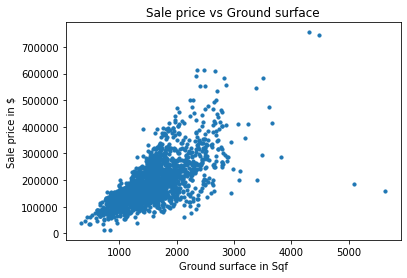

In [25]:
# plot sale price vs ground surface
plt.scatter(hp_noNaN['Gr Liv Area'],hp_noNaN['SalePrice'], s=10)
plt.xlabel('Ground surface in Sqf')
plt.ylabel('Sale price in $')
plt.title('Sale price vs Ground surface')

In [26]:
# Define the function which will help to identify data with a std deviation >3 (i.e outliers)
# Ground surface
z_score = np.abs(hp_noNaN['Gr Liv Area'] - hp_noNaN['Gr Liv Area'].mean()) > (3*hp_noNaN['Gr Liv Area'].std())
z_score.sum()

16

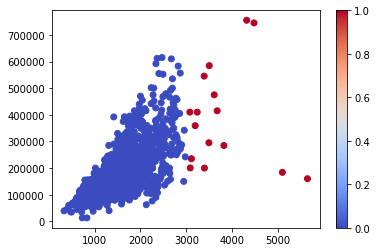

In [27]:
# Plot them
plt.scatter(hp_noNaN['Gr Liv Area'],hp_noNaN['SalePrice'], c=z_score, cmap=plt.cm.coolwarm)
plt.colorbar()
plt.show()

In [28]:
# Select all the rows now considered as outliers for ground surface
outliers1 = hp_noNaN.loc[z_score, :]
outliers1.shape

(16, 79)

In [29]:
# define a new dataframe without outliers
hp_no_outliers1 = hp_noNaN.drop(outliers1.index, axis=0)
hp_no_outliers1.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Bedroom AbvGr,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Condition 1,Condition 2,Electrical,Enclosed Porch,Exter Cond,Exter Qual,Exterior 1st,Exterior 2nd,Fireplace Qu,Fireplaces,Foundation,Full Bath,Functional,Garage Area,Garage Cars,Garage Cond,Garage Finish,Garage Modernity,Garage Qual,Garage Type,Gr Liv Area,Half Bath,Heating,Heating QC,House Style,Kitchen AbvGr,Kitchen Qual,Land Contour,Land Slope,LogSalePrice,Lot Area,Lot Config,Lot Frontage,Lot Shape,Low Qual Fin SF,MS SubClass,MS Zoning,Mas Vnr Area,Mas Vnr Type,Misc Val,Mo Sold,Neighborhood,Open Porch SF,Order,Overall Cond,Overall Qual,PID,Paved Drive,Pool Area,Roof Matl,Roof Style,Sale Condition,Sale Type,SalePrice,Screen Porch,Street,TotRms AbvGrd,Total Bsmt SF,Utilities,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold
0,980,1276,0,4,1Fam,TA,No,0.0,0.0,Gd,652.0,300.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,TA,1,PConc,2,Typ,554.0,2.0,TA,Fin,7,TA,BuiltIn,2256,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,5.372912,8795,Inside,68.0,IR1,0,60,RL,0.0,None,0,4,Gilbert,54,484,5,7,528275070,Y,0,CompShg,Gable,Normal,WD,236000,0,Pave,8,952.0,AllPub,224,2000,2000,2009
1,1575,0,0,2,1Fam,TA,No,0.0,0.0,TA,216.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,Wd Sdng,Wd Sdng,Gd,1,CBlock,1,Typ,400.0,2.0,TA,Unf,1,TA,Attchd,1575,1,GasA,TA,1Story,1,Gd,Lvl,Gtl,5.190332,10170,Corner,75.0,Reg,0,20,RL,522.0,BrkFace,0,6,NAmes,0,2586,6,6,535305120,Y,0,CompShg,Hip,Normal,WD,155000,0,Pave,5,216.0,AllPub,0,1951,1951,2006
2,546,546,0,3,Twnhs,TA,No,0.0,0.0,TA,546.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,CemntBd,CmentBd,tagada,0,CBlock,1,Typ,286.0,1.0,TA,Unf,3,TA,Attchd,1092,1,GasA,Fa,2Story,1,TA,Lvl,Gtl,4.875061,2001,Inside,21.0,Reg,0,160,RM,80.0,BrkFace,0,1,MeadowV,0,2289,5,4,923228250,Y,0,CompShg,Gable,Normal,WD,75000,0,Pave,6,546.0,AllPub,0,1970,1970,2007
3,1700,0,0,4,1Fam,TA,No,0.0,1.0,TA,380.0,1018.0,0.0,Rec,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,BrkFace,BrkFace,Gd,1,CBlock,1,Typ,447.0,2.0,TA,RFn,2,TA,Attchd,1700,1,GasA,Gd,1Story,1,Gd,Lvl,Gtl,5.218798,10552,Inside,70.0,IR1,0,20,RL,0.0,None,0,4,NAmes,38,142,5,5,535152150,Y,0,CompShg,Hip,Normal,WD,165500,0,Pave,6,1398.0,AllPub,0,1959,1959,2010
4,964,925,0,4,2fmCon,TA,No,0.0,0.0,TA,925.0,0.0,0.0,Unf,Unf,N,Feedr,Norm,FuseF,264,TA,Fa,Wd Sdng,Wd Sdng,Gd,1,CBlock,1,Typ,308.0,1.0,TA,Unf,2,TA,Detchd,1889,1,GasA,TA,2.5Unf,2,TA,Bnk,Gtl,5.086360,10120,Inside,60.0,IR1,0,190,RM,0.0,None,0,1,OldTown,0,2042,4,7,903475060,N,0,CompShg,Hip,Normal,WD,122000,0,Pave,9,925.0,AllPub,0,1910,1950,2007


In [30]:
hp_no_outliers1.shape

(2414, 79)

## Feature engineering, encoding
> * **Create new continuous features (based on existing ones) and delete not useful ones**
* **Analysis of the distribution of continuous data**
* **Decision about continuous data**
* **Transform ordinal and categorical features**
* **Analysis of nominal/ordinal**
* **Decision about nominal/ordinal data**

### Create new features - Continuous data (based on existing ones; e.g. grouping)
##### Surface related features
* Tot_liv_SF = Total living surface = Total Bsmt SF + Gr Liv Area + 1st Flr SF + 2nd Flr SF
* Tot_ext_SF =  Total exterior living surface = Mas Vnr Area+ Wood Deck SF+ Open Porch SF+ Enclosed Porch+ 3-Ssn Porch+ Screen Porch+Pool Area
* Gr_tot_SF = Grand total surface = Tot_liv_SF + Tot_ext_SF + Garage Area
* SF_ind=Surface indicator = Lot Area - Gr_tot_SF (should not be negative) # to be checked 186 houses with negative indicator

##### Time related features
* Remod_ind = Remodeling or add indicator = (Yr Sold-Year Built) - (Year Remod/Add-Year Built). Lower the value is, better the condition of the house is supposed to be

#### Create new surface related features

In [31]:
# Rename the reference dataframe hp_no_outliers1
hp_new1=hp_no_outliers1

In [32]:
# Create new features
hp_new1['Tot_liv_SF']=hp_new1['Total Bsmt SF'] + hp_new1['Gr Liv Area'] + hp_new1['1st Flr SF'] + hp_new1['2nd Flr SF']
hp_new1['Tot_ext_SF'] =  hp_new1['Mas Vnr Area']+ hp_new1['Wood Deck SF']+ hp_new1['Open Porch SF']+ hp_new1['Enclosed Porch']+ hp_new1['3Ssn Porch']+ hp_new1['Screen Porch']+hp_new1['Pool Area']
hp_new1['Gr_tot_SF'] = hp_new1['Tot_liv_SF'] + hp_new1['Tot_ext_SF'] + hp_new1['Garage Area']
hp_new1['SF_ind']=hp_new1['Lot Area'] - hp_new1['Gr_tot_SF']
hp_new1['Remod_ind'] = (hp_new1['Yr Sold'] - hp_new1['Year Built']) - (hp_new1['Year Remod/Add']-hp_new1['Year Built'])
hp_new1.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Bedroom AbvGr,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Condition 1,Condition 2,Electrical,Enclosed Porch,Exter Cond,Exter Qual,Exterior 1st,Exterior 2nd,Fireplace Qu,Fireplaces,Foundation,Full Bath,Functional,Garage Area,Garage Cars,Garage Cond,Garage Finish,Garage Modernity,Garage Qual,Garage Type,Gr Liv Area,Half Bath,Heating,Heating QC,House Style,Kitchen AbvGr,Kitchen Qual,Land Contour,Land Slope,LogSalePrice,Lot Area,Lot Config,Lot Frontage,Lot Shape,Low Qual Fin SF,MS SubClass,MS Zoning,Mas Vnr Area,Mas Vnr Type,Misc Val,Mo Sold,Neighborhood,Open Porch SF,Order,Overall Cond,Overall Qual,PID,Paved Drive,Pool Area,Roof Matl,Roof Style,Sale Condition,Sale Type,SalePrice,Screen Porch,Street,TotRms AbvGrd,Total Bsmt SF,Utilities,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold,Tot_liv_SF,Tot_ext_SF,Gr_tot_SF,SF_ind,Remod_ind
0,980,1276,0,4,1Fam,TA,No,0.0,0.0,Gd,652.0,300.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,TA,1,PConc,2,Typ,554.0,2.0,TA,Fin,7,TA,BuiltIn,2256,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,5.372912,8795,Inside,68.0,IR1,0,60,RL,0.0,None,0,4,Gilbert,54,484,5,7,528275070,Y,0,CompShg,Gable,Normal,WD,236000,0,Pave,8,952.0,AllPub,224,2000,2000,2009,5464.0,278.0,6296.0,2499.0,9
1,1575,0,0,2,1Fam,TA,No,0.0,0.0,TA,216.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,Wd Sdng,Wd Sdng,Gd,1,CBlock,1,Typ,400.0,2.0,TA,Unf,1,TA,Attchd,1575,1,GasA,TA,1Story,1,Gd,Lvl,Gtl,5.190332,10170,Corner,75.0,Reg,0,20,RL,522.0,BrkFace,0,6,NAmes,0,2586,6,6,535305120,Y,0,CompShg,Hip,Normal,WD,155000,0,Pave,5,216.0,AllPub,0,1951,1951,2006,3366.0,522.0,4288.0,5882.0,55
2,546,546,0,3,Twnhs,TA,No,0.0,0.0,TA,546.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,CemntBd,CmentBd,tagada,0,CBlock,1,Typ,286.0,1.0,TA,Unf,3,TA,Attchd,1092,1,GasA,Fa,2Story,1,TA,Lvl,Gtl,4.875061,2001,Inside,21.0,Reg,0,160,RM,80.0,BrkFace,0,1,MeadowV,0,2289,5,4,923228250,Y,0,CompShg,Gable,Normal,WD,75000,0,Pave,6,546.0,AllPub,0,1970,1970,2007,2730.0,80.0,3096.0,-1095.0,37
3,1700,0,0,4,1Fam,TA,No,0.0,1.0,TA,380.0,1018.0,0.0,Rec,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,BrkFace,BrkFace,Gd,1,CBlock,1,Typ,447.0,2.0,TA,RFn,2,TA,Attchd,1700,1,GasA,Gd,1Story,1,Gd,Lvl,Gtl,5.218798,10552,Inside,70.0,IR1,0,20,RL,0.0,None,0,4,NAmes,38,142,5,5,535152150,Y,0,CompShg,Hip,Normal,WD,165500,0,Pave,6,1398.0,AllPub,0,1959,1959,2010,4798.0,38.0,5283.0,5269.0,51
4,964,925,0,4,2fmCon,TA,No,0.0,0.0,TA,925.0,0.0,0.0,Unf,Unf,N,Feedr,Norm,FuseF,264,TA,Fa,Wd Sdng,Wd Sdng,Gd,1,CBlock,1,Typ,308.0,1.0,TA,Unf,2,TA,Detchd,1889,1,GasA,TA,2.5Unf,2,TA,Bnk,Gtl,5.086360,10120,Inside,60.0,IR1,0,190,RM,0.0,None,0,1,OldTown,0,2042,4,7,903475060,N,0,CompShg,Hip,Normal,WD,122000,0,Pave,9,925.0,AllPub,0,1910,1950,2007,4703.0,264.0,5275.0,4845.0,57


In [33]:
(hp_new1['SF_ind']<0).sum()

186

### Continuous features to be removed
##### Features used for grouping
* Total Bsmt SF + Gr Liv Area + 1st Flr SF + 2nd Flr SF (grouped in the feature: Tot_liv_SF)
* Mas Vnr Area+ Wood Deck SF+ Open Porch SF+ Enclosed Porch+ 3-Ssn Porch+ Screen Porch+Pool Area (grouped in the feature: Tot_ext_SF)
* Features which are included in the TotRmsAbvGrd:Bedroom AbvGr, Kitchen AbvGr 

##### Features with very low number of data points
* Low Qual Fin SF (26 data points)
* Misc Val (89 data points)

In [34]:
(hp_new1['Misc Val']>0).sum()

87

### Removal of continuous features used for calculation

In [35]:
# Remove features used for Tot_liv_SF
remove = ['Total Bsmt SF','Gr Liv Area','1st Flr SF','2nd Flr SF']
hp_new1.drop(remove, inplace=True, axis=1)

In [36]:
# Remove features used for Tot_ext_SF
remove1 = ['Mas Vnr Area','Wood Deck SF','Open Porch SF','Enclosed Porch','3Ssn Porch','Screen Porch','Pool Area']
hp_new1.drop(remove1, inplace=True, axis=1)

In [37]:
# Remove features with very low number of data points
remove2 = ['Low Qual Fin SF','Misc Val']
hp_new1.drop(remove2, inplace=True, axis=1)

In [38]:
# Remove features which are included in an existing total
remove3= ['Bedroom AbvGr', 'Kitchen AbvGr']
hp_new1.drop(remove3, inplace=True, axis=1)

In [39]:
hp_new1.head()

,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Condition 1,Condition 2,Electrical,Exter Cond,Exter Qual,Exterior 1st,Exterior 2nd,Fireplace Qu,Fireplaces,Foundation,Full Bath,Functional,Garage Area,Garage Cars,Garage Cond,Garage Finish,Garage Modernity,Garage Qual,Garage Type,Half Bath,Heating,Heating QC,House Style,Kitchen Qual,Land Contour,Land Slope,LogSalePrice,Lot Area,Lot Config,Lot Frontage,Lot Shape,MS SubClass,MS Zoning,Mas Vnr Type,Mo Sold,Neighborhood,Order,Overall Cond,Overall Qual,PID,Paved Drive,Roof Matl,Roof Style,Sale Condition,Sale Type,SalePrice,Street,TotRms AbvGrd,Utilities,Year Built,Year Remod/Add,Yr Sold,Tot_liv_SF,Tot_ext_SF,Gr_tot_SF,SF_ind,Remod_ind
0,1Fam,TA,No,0.0,0.0,Gd,652.0,300.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,TA,1,PConc,2,Typ,554.0,2.0,TA,Fin,7,TA,BuiltIn,1,GasA,Ex,2Story,Gd,Lvl,Gtl,5.372912,8795,Inside,68.0,IR1,60,RL,None,4,Gilbert,484,5,7,528275070,Y,CompShg,Gable,Normal,WD,236000,Pave,8,AllPub,2000,2000,2009,5464.0,278.0,6296.0,2499.0,9
1,1Fam,TA,No,0.0,0.0,TA,216.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,TA,TA,Wd Sdng,Wd Sdng,Gd,1,CBlock,1,Typ,400.0,2.0,TA,Unf,1,TA,Attchd,1,GasA,TA,1Story,Gd,Lvl,Gtl,5.190332,10170,Corner,75.0,Reg,20,RL,BrkFace,6,NAmes,2586,6,6,535305120,Y,CompShg,Hip,Normal,WD,155000,Pave,5,AllPub,1951,1951,2006,3366.0,522.0,4288.0,5882.0,55
2,Twnhs,TA,No,0.0,0.0,TA,546.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,TA,TA,CemntBd,CmentBd,tagada,0,CBlock,1,Typ,286.0,1.0,TA,Unf,3,TA,Attchd,1,GasA,Fa,2Story,TA,Lvl,Gtl,4.875061,2001,Inside,21.0,Reg,160,RM,BrkFace,1,MeadowV,2289,5,4,923228250,Y,CompShg,Gable,Normal,WD,75000,Pave,6,AllPub,1970,1970,2007,2730.0,80.0,3096.0,-1095.0,37
3,1Fam,TA,No,0.0,1.0,TA,380.0,1018.0,0.0,Rec,Unf,Y,Norm,Norm,SBrkr,TA,TA,BrkFace,BrkFace,Gd,1,CBlock,1,Typ,447.0,2.0,TA,RFn,2,TA,Attchd,1,GasA,Gd,1Story,Gd,Lvl,Gtl,5.218798,10552,Inside,70.0,IR1,20,RL,None,4,NAmes,142,5,5,535152150,Y,CompShg,Hip,Normal,WD,165500,Pave,6,AllPub,1959,1959,2010,4798.0,38.0,5283.0,5269.0,51
4,2fmCon,TA,No,0.0,0.0,TA,925.0,0.0,0.0,Unf,Unf,N,Feedr,Norm,FuseF,TA,Fa,Wd Sdng,Wd Sdng,Gd,1,CBlock,1,Typ,308.0,1.0,TA,Unf,2,TA,Detchd,1,GasA,TA,2.5Unf,TA,Bnk,Gtl,5.086360,10120,Inside,60.0,IR1,190,RM,None,1,OldTown,2042,4,7,903475060,N,CompShg,Hip,Normal,WD,122000,Pave,9,AllPub,1910,1950,2007,4703.0,264.0,5275.0,4845.0,57


In [40]:
hp_new1.shape

(2414, 69)

 ## Analyze the distribution of continuous data

#### Analysis of Skewness and Kurtosis
* We will focus on variables with continuous data: Lot Frontage, Lot Area, Mas Vnr Area, BsmtFin SF 1, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, 1st Flr SF,2nd Flr SF,Low Qual Fin SF, Gr Liv Area, Garage Area, Wood Deck SF, Open Porch SF, Enclosed Porch, 3-Ssn Porch, Screen Porch,Pool Area, Misc Val, 
* We will address features with Skewness >|1| and Kurtosis >|3|

In [41]:
# select the continuous features
hp_new1_cont = hp_new1.select_dtypes(include=[np.float64, np.int64])
hp_new1_cont.head()

,Bsmt Full Bath,Bsmt Half Bath,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,Fireplaces,Full Bath,Garage Area,Garage Cars,Half Bath,LogSalePrice,Lot Area,Lot Frontage,MS SubClass,Mo Sold,Order,Overall Cond,Overall Qual,PID,SalePrice,TotRms AbvGrd,Year Built,Year Remod/Add,Yr Sold,Tot_liv_SF,Tot_ext_SF,Gr_tot_SF,SF_ind,Remod_ind
0,0.0,0.0,652.0,300.0,0.0,1,2,554.0,2.0,1,5.372912,8795,68.0,60,4,484,5,7,528275070,236000,8,2000,2000,2009,5464.0,278.0,6296.0,2499.0,9
1,0.0,0.0,216.0,0.0,0.0,1,1,400.0,2.0,1,5.190332,10170,75.0,20,6,2586,6,6,535305120,155000,5,1951,1951,2006,3366.0,522.0,4288.0,5882.0,55
2,0.0,0.0,546.0,0.0,0.0,0,1,286.0,1.0,1,4.875061,2001,21.0,160,1,2289,5,4,923228250,75000,6,1970,1970,2007,2730.0,80.0,3096.0,-1095.0,37
3,0.0,1.0,380.0,1018.0,0.0,1,1,447.0,2.0,1,5.218798,10552,70.0,20,4,142,5,5,535152150,165500,6,1959,1959,2010,4798.0,38.0,5283.0,5269.0,51
4,0.0,0.0,925.0,0.0,0.0,1,1,308.0,1.0,1,5.086360,10120,60.0,190,1,2042,4,7,903475060,122000,9,1910,1950,2007,4703.0,264.0,5275.0,4845.0,57


In [42]:
hp_num_skew1=hp_new1_cont.apply(skew, axis=0)
hp_num_skew1=pd.DataFrame(hp_num_skew1, columns=['skewness'])

In [43]:
hp_num_kurt1=hp_new1_cont.apply(kurtosis, axis=0)
hp_num_kurt1=pd.DataFrame(hp_num_kurt1, columns=['kurtosis'])

In [44]:
hp_dist=[(hp_num_skew1['skewness'] > 1) & (hp_num_kurt1['kurtosis'] >3)]
hp_dist

[Bsmt Full Bath    False
 Bsmt Half Bath     True
 Bsmt Unf SF       False
 BsmtFin SF 1      False
 BsmtFin SF 2       True
 Fireplaces        False
 Full Bath         False
 Garage Area       False
 Garage Cars       False
 Half Bath         False
 LogSalePrice      False
 Lot Area           True
 Lot Frontage       True
 MS SubClass       False
 Mo Sold           False
 Order             False
 Overall Cond      False
 Overall Qual      False
 PID               False
 SalePrice          True
 TotRms AbvGrd     False
 Year Built        False
 Year Remod/Add    False
 Yr Sold           False
 Tot_liv_SF        False
 Tot_ext_SF         True
 Gr_tot_SF         False
 SF_ind             True
 Remod_ind         False
 dtype: bool]

#### Features to be considered for a transformation

In [45]:
# Bsmt Half Bath      To be decided if we keep it
# BsmtFin SF 2        To be decided if we keep it
# Lot Frontage        To be decided if we keep it
# Lot Area            To be transformed
# SalesPrice         (already done)

#### Visualize distribution for skewed features

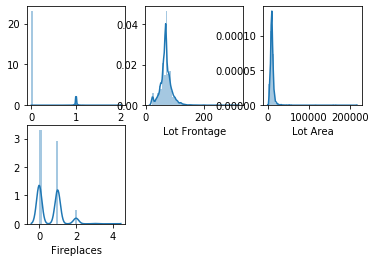

In [46]:
# Plot distribution and probability plot
plt.subplot(231)
sns.distplot(hp_new1_cont['Bsmt Half Bath'])
plt.subplot(232)
sns.distplot(hp_new1_cont['Lot Frontage'])
plt.subplot(233)
sns.distplot(hp_new1_cont['Lot Area'])
plt.subplot(234)
sns.distplot(hp_new1_cont['Fireplaces'])


In [47]:
# Add a Log_LotArea variable to the DataFrame
hp_new1['Log_LotArea'] = np.log10(hp_new1['Lot Area'])
hp_new1.head()

,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Condition 1,Condition 2,Electrical,Exter Cond,Exter Qual,Exterior 1st,Exterior 2nd,Fireplace Qu,Fireplaces,Foundation,Full Bath,Functional,Garage Area,Garage Cars,Garage Cond,Garage Finish,Garage Modernity,Garage Qual,Garage Type,Half Bath,Heating,Heating QC,House Style,Kitchen Qual,Land Contour,Land Slope,LogSalePrice,Lot Area,Lot Config,Lot Frontage,Lot Shape,MS SubClass,MS Zoning,Mas Vnr Type,Mo Sold,Neighborhood,Order,Overall Cond,Overall Qual,PID,Paved Drive,Roof Matl,Roof Style,Sale Condition,Sale Type,SalePrice,Street,TotRms AbvGrd,Utilities,Year Built,Year Remod/Add,Yr Sold,Tot_liv_SF,Tot_ext_SF,Gr_tot_SF,SF_ind,Remod_ind,Log_LotArea
0,1Fam,TA,No,0.0,0.0,Gd,652.0,300.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,TA,1,PConc,2,Typ,554.0,2.0,TA,Fin,7,TA,BuiltIn,1,GasA,Ex,2Story,Gd,Lvl,Gtl,5.372912,8795,Inside,68.0,IR1,60,RL,None,4,Gilbert,484,5,7,528275070,Y,CompShg,Gable,Normal,WD,236000,Pave,8,AllPub,2000,2000,2009,5464.0,278.0,6296.0,2499.0,9,3.944236
1,1Fam,TA,No,0.0,0.0,TA,216.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,TA,TA,Wd Sdng,Wd Sdng,Gd,1,CBlock,1,Typ,400.0,2.0,TA,Unf,1,TA,Attchd,1,GasA,TA,1Story,Gd,Lvl,Gtl,5.190332,10170,Corner,75.0,Reg,20,RL,BrkFace,6,NAmes,2586,6,6,535305120,Y,CompShg,Hip,Normal,WD,155000,Pave,5,AllPub,1951,1951,2006,3366.0,522.0,4288.0,5882.0,55,4.007321
2,Twnhs,TA,No,0.0,0.0,TA,546.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,TA,TA,CemntBd,CmentBd,tagada,0,CBlock,1,Typ,286.0,1.0,TA,Unf,3,TA,Attchd,1,GasA,Fa,2Story,TA,Lvl,Gtl,4.875061,2001,Inside,21.0,Reg,160,RM,BrkFace,1,MeadowV,2289,5,4,923228250,Y,CompShg,Gable,Normal,WD,75000,Pave,6,AllPub,1970,1970,2007,2730.0,80.0,3096.0,-1095.0,37,3.301247
3,1Fam,TA,No,0.0,1.0,TA,380.0,1018.0,0.0,Rec,Unf,Y,Norm,Norm,SBrkr,TA,TA,BrkFace,BrkFace,Gd,1,CBlock,1,Typ,447.0,2.0,TA,RFn,2,TA,Attchd,1,GasA,Gd,1Story,Gd,Lvl,Gtl,5.218798,10552,Inside,70.0,IR1,20,RL,None,4,NAmes,142,5,5,535152150,Y,CompShg,Hip,Normal,WD,165500,Pave,6,AllPub,1959,1959,2010,4798.0,38.0,5283.0,5269.0,51,4.023335
4,2fmCon,TA,No,0.0,0.0,TA,925.0,0.0,0.0,Unf,Unf,N,Feedr,Norm,FuseF,TA,Fa,Wd Sdng,Wd Sdng,Gd,1,CBlock,1,Typ,308.0,1.0,TA,Unf,2,TA,Detchd,1,GasA,TA,2.5Unf,TA,Bnk,Gtl,5.086360,10120,Inside,60.0,IR1,190,RM,None,1,OldTown,2042,4,7,903475060,N,CompShg,Hip,Normal,WD,122000,Pave,9,AllPub,1910,1950,2007,4703.0,264.0,5275.0,4845.0,57,4.005181


In [48]:
hp_new1.shape

(2414, 70)

In [49]:
hp_new1['Electrical'].value_counts()

SBrkr     2208
FuseA      159
FuseF       38
FuseP        7
tagada       1
Mix          1
Name: Electrical, dtype: int64

### Visualize distribution before/after transformation + Probability plot

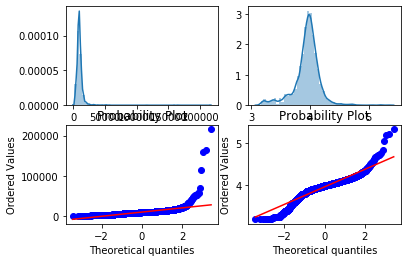

In [50]:
plt.subplot(221)
sns.distplot(hp_new1['Lot Area'])
plt.subplot(222)
sns.distplot(hp_new1['Log_LotArea'])
plt.subplot(223)
stats.probplot(hp_new1['Lot Area'], plot=plt)
plt.subplot(224)
stats.probplot(hp_new1['Log_LotArea'], plot=plt)
plt.rcParams["figure.figsize"] = (15,15)

### Analyze the ordinal and nominal features

In [51]:
# select the object columns
hp_new1_obj = hp_new1.select_dtypes(exclude=[np.number])
hp_new1_obj.head()

,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Qual,BsmtFin Type 1,BsmtFin Type 2,Central Air,Condition 1,Condition 2,Electrical,Exter Cond,Exter Qual,Exterior 1st,Exterior 2nd,Fireplace Qu,Foundation,Functional,Garage Cond,Garage Finish,Garage Qual,Garage Type,Heating,Heating QC,House Style,Kitchen Qual,Land Contour,Land Slope,Lot Config,Lot Shape,MS Zoning,Mas Vnr Type,Neighborhood,Paved Drive,Roof Matl,Roof Style,Sale Condition,Sale Type,Street,Utilities
0,1Fam,TA,No,Gd,GLQ,Unf,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,TA,PConc,Typ,TA,Fin,TA,BuiltIn,GasA,Ex,2Story,Gd,Lvl,Gtl,Inside,IR1,RL,None,Gilbert,Y,CompShg,Gable,Normal,WD,Pave,AllPub
1,1Fam,TA,No,TA,Unf,Unf,Y,Norm,Norm,SBrkr,TA,TA,Wd Sdng,Wd Sdng,Gd,CBlock,Typ,TA,Unf,TA,Attchd,GasA,TA,1Story,Gd,Lvl,Gtl,Corner,Reg,RL,BrkFace,NAmes,Y,CompShg,Hip,Normal,WD,Pave,AllPub
2,Twnhs,TA,No,TA,Unf,Unf,Y,Norm,Norm,SBrkr,TA,TA,CemntBd,CmentBd,tagada,CBlock,Typ,TA,Unf,TA,Attchd,GasA,Fa,2Story,TA,Lvl,Gtl,Inside,Reg,RM,BrkFace,MeadowV,Y,CompShg,Gable,Normal,WD,Pave,AllPub
3,1Fam,TA,No,TA,Rec,Unf,Y,Norm,Norm,SBrkr,TA,TA,BrkFace,BrkFace,Gd,CBlock,Typ,TA,RFn,TA,Attchd,GasA,Gd,1Story,Gd,Lvl,Gtl,Inside,IR1,RL,None,NAmes,Y,CompShg,Hip,Normal,WD,Pave,AllPub
4,2fmCon,TA,No,TA,Unf,Unf,N,Feedr,Norm,FuseF,TA,Fa,Wd Sdng,Wd Sdng,Gd,CBlock,Typ,TA,Unf,TA,Detchd,GasA,TA,2.5Unf,TA,Bnk,Gtl,Inside,IR1,RM,None,OldTown,N,CompShg,Hip,Normal,WD,Pave,AllPub


In [52]:
hp_new1_obj.shape

(2414, 39)

####  Encode ordinal features
* ordinal features will be encoded with the "replace" function to avoid bias of LabelEncoder() (change the ranking with each dataset) with the submission data

In [53]:
# Create a dataframe with ordinal features
hp_new1_ordi=hp_new1[['Lot Shape','Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Heating QC','Electrical',
                     'Kitchen Qual','Functional','Fireplace Qu','Garage Finish','Garage Qual',
                     'Garage Cond','Paved Drive', 'Exter Qual', 'Exter Cond', 'Utilities', 'Land Slope']]


In [54]:
hp_new1_ordi.head()

,Lot Shape,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating QC,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Exter Qual,Exter Cond,Utilities,Land Slope
0,IR1,Gd,TA,No,GLQ,Unf,Ex,SBrkr,Gd,Typ,TA,Fin,TA,TA,Y,Gd,TA,AllPub,Gtl
1,Reg,TA,TA,No,Unf,Unf,TA,SBrkr,Gd,Typ,Gd,Unf,TA,TA,Y,TA,TA,AllPub,Gtl
2,Reg,TA,TA,No,Unf,Unf,Fa,SBrkr,TA,Typ,tagada,Unf,TA,TA,Y,TA,TA,AllPub,Gtl
3,IR1,TA,TA,No,Rec,Unf,Gd,SBrkr,Gd,Typ,Gd,RFn,TA,TA,Y,TA,TA,AllPub,Gtl
4,IR1,TA,TA,No,Unf,Unf,TA,FuseF,TA,Typ,Gd,Unf,TA,TA,N,Fa,TA,AllPub,Gtl


In [55]:
hp_new1_ordi.dtypes

Lot Shape         object
Bsmt Qual         object
Bsmt Cond         object
Bsmt Exposure     object
BsmtFin Type 1    object
BsmtFin Type 2    object
Heating QC        object
Electrical        object
Kitchen Qual      object
Functional        object
Fireplace Qu      object
Garage Finish     object
Garage Qual       object
Garage Cond       object
Paved Drive       object
Exter Qual        object
Exter Cond        object
Utilities         object
Land Slope        object
dtype: object

In [56]:
hp_new1_ordi = hp_new1_ordi.replace({"Bsmt Cond" : {"tagada" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                                     "Bsmt Exposure" : {"tagada":0, "No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                                     "BsmtFin Type 1" : {"tagada" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                                     "Bsmt Fin Type 2" : {"tagada" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                                     "Bsmt Qual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                                     "Exter Cond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                                     "Exter Qual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                                     "Fireplace Qu" : {"tagada":0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                                     "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, "Min2" : 6, "Min1" : 7, "Typ" : 8},
                                     "Garage Cond" : {"tagada" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                                     "Garage Qual" : {"tagada" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                                     "Heating QC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                                     "Kitchen Qual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                                     "Land Slope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                                     "Lot Shape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                                     "Paved Drive" : {"N" : 0, "P" : 1, "Y" : 2}, "Street" : {"Grvl" : 1, "Pave" : 2},
                                     "Electrical" : {"tagada":0, "Mix":0, "FuseP":1,"FuseF":2,"FuseA":3,"SBrkr":4},
                                     "Garage Finish" : {"tagada" : 0, "Unf" : 1, "RFn":2,"Fin":3},
                                     "Utilities" : {"NoSeWa" : 1, "NoSewr" : 2, "AllPub" : 3}})

#### Encode nominal features

In [57]:
hp_new1.shape 

(2414, 70)

In [58]:
hp_new1_obj.shape

(2414, 39)

In [59]:
hp_new1_norm=hp_new1_obj.drop(columns=['Lot Shape','Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Heating QC','Electrical',
                     'Kitchen Qual','Functional','Fireplace Qu','Garage Finish','Garage Qual',
                     'Garage Cond','Paved Drive', 'Exter Qual', 'Exter Cond', 'Utilities', 'Land Slope'])

In [60]:
hp_new1_norm.head()

,Bldg Type,Central Air,Condition 1,Condition 2,Exterior 1st,Exterior 2nd,Foundation,Garage Type,Heating,House Style,Land Contour,Lot Config,MS Zoning,Mas Vnr Type,Neighborhood,Roof Matl,Roof Style,Sale Condition,Sale Type,Street
0,1Fam,Y,Norm,Norm,VinylSd,VinylSd,PConc,BuiltIn,GasA,2Story,Lvl,Inside,RL,None,Gilbert,CompShg,Gable,Normal,WD,Pave
1,1Fam,Y,Norm,Norm,Wd Sdng,Wd Sdng,CBlock,Attchd,GasA,1Story,Lvl,Corner,RL,BrkFace,NAmes,CompShg,Hip,Normal,WD,Pave
2,Twnhs,Y,Norm,Norm,CemntBd,CmentBd,CBlock,Attchd,GasA,2Story,Lvl,Inside,RM,BrkFace,MeadowV,CompShg,Gable,Normal,WD,Pave
3,1Fam,Y,Norm,Norm,BrkFace,BrkFace,CBlock,Attchd,GasA,1Story,Lvl,Inside,RL,None,NAmes,CompShg,Hip,Normal,WD,Pave
4,2fmCon,N,Feedr,Norm,Wd Sdng,Wd Sdng,CBlock,Detchd,GasA,2.5Unf,Bnk,Inside,RM,None,OldTown,CompShg,Hip,Normal,WD,Pave


In [61]:
hp_new1_norm.shape

(2414, 20)

In [62]:
encode_norm= pd.get_dummies(hp_new1_norm)

In [63]:
encode_norm.shape

(2414, 163)

In [64]:
# Transform dtype from uint8 to int64
encode_norm1=encode_norm.astype(np.int64)

### Consolidate dataframe with numerical and transformed categorical features

In [65]:
hp_new1.head()

,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Condition 1,Condition 2,Electrical,Exter Cond,Exter Qual,Exterior 1st,Exterior 2nd,Fireplace Qu,Fireplaces,Foundation,Full Bath,Functional,Garage Area,Garage Cars,Garage Cond,Garage Finish,Garage Modernity,Garage Qual,Garage Type,Half Bath,Heating,Heating QC,House Style,Kitchen Qual,Land Contour,Land Slope,LogSalePrice,Lot Area,Lot Config,Lot Frontage,Lot Shape,MS SubClass,MS Zoning,Mas Vnr Type,Mo Sold,Neighborhood,Order,Overall Cond,Overall Qual,PID,Paved Drive,Roof Matl,Roof Style,Sale Condition,Sale Type,SalePrice,Street,TotRms AbvGrd,Utilities,Year Built,Year Remod/Add,Yr Sold,Tot_liv_SF,Tot_ext_SF,Gr_tot_SF,SF_ind,Remod_ind,Log_LotArea
0,1Fam,TA,No,0.0,0.0,Gd,652.0,300.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,TA,1,PConc,2,Typ,554.0,2.0,TA,Fin,7,TA,BuiltIn,1,GasA,Ex,2Story,Gd,Lvl,Gtl,5.372912,8795,Inside,68.0,IR1,60,RL,None,4,Gilbert,484,5,7,528275070,Y,CompShg,Gable,Normal,WD,236000,Pave,8,AllPub,2000,2000,2009,5464.0,278.0,6296.0,2499.0,9,3.944236
1,1Fam,TA,No,0.0,0.0,TA,216.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,TA,TA,Wd Sdng,Wd Sdng,Gd,1,CBlock,1,Typ,400.0,2.0,TA,Unf,1,TA,Attchd,1,GasA,TA,1Story,Gd,Lvl,Gtl,5.190332,10170,Corner,75.0,Reg,20,RL,BrkFace,6,NAmes,2586,6,6,535305120,Y,CompShg,Hip,Normal,WD,155000,Pave,5,AllPub,1951,1951,2006,3366.0,522.0,4288.0,5882.0,55,4.007321
2,Twnhs,TA,No,0.0,0.0,TA,546.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,TA,TA,CemntBd,CmentBd,tagada,0,CBlock,1,Typ,286.0,1.0,TA,Unf,3,TA,Attchd,1,GasA,Fa,2Story,TA,Lvl,Gtl,4.875061,2001,Inside,21.0,Reg,160,RM,BrkFace,1,MeadowV,2289,5,4,923228250,Y,CompShg,Gable,Normal,WD,75000,Pave,6,AllPub,1970,1970,2007,2730.0,80.0,3096.0,-1095.0,37,3.301247
3,1Fam,TA,No,0.0,1.0,TA,380.0,1018.0,0.0,Rec,Unf,Y,Norm,Norm,SBrkr,TA,TA,BrkFace,BrkFace,Gd,1,CBlock,1,Typ,447.0,2.0,TA,RFn,2,TA,Attchd,1,GasA,Gd,1Story,Gd,Lvl,Gtl,5.218798,10552,Inside,70.0,IR1,20,RL,None,4,NAmes,142,5,5,535152150,Y,CompShg,Hip,Normal,WD,165500,Pave,6,AllPub,1959,1959,2010,4798.0,38.0,5283.0,5269.0,51,4.023335
4,2fmCon,TA,No,0.0,0.0,TA,925.0,0.0,0.0,Unf,Unf,N,Feedr,Norm,FuseF,TA,Fa,Wd Sdng,Wd Sdng,Gd,1,CBlock,1,Typ,308.0,1.0,TA,Unf,2,TA,Detchd,1,GasA,TA,2.5Unf,TA,Bnk,Gtl,5.086360,10120,Inside,60.0,IR1,190,RM,None,1,OldTown,2042,4,7,903475060,N,CompShg,Hip,Normal,WD,122000,Pave,9,AllPub,1910,1950,2007,4703.0,264.0,5275.0,4845.0,57,4.005181


In [66]:
# Create a data frame with numerical data
hp_num_int1 = hp_new1.select_dtypes(include=[np.int64, np.float64])
hp_num_int1.shape

(2414, 30)

In [67]:
hp_num_int1.dtypes

Bsmt Full Bath    float64
Bsmt Half Bath    float64
Bsmt Unf SF       float64
BsmtFin SF 1      float64
BsmtFin SF 2      float64
Fireplaces          int64
Full Bath           int64
Garage Area       float64
Garage Cars       float64
Half Bath           int64
LogSalePrice      float64
Lot Area            int64
Lot Frontage      float64
MS SubClass         int64
Mo Sold             int64
Order               int64
Overall Cond        int64
Overall Qual        int64
PID                 int64
SalePrice           int64
TotRms AbvGrd       int64
Year Built          int64
Year Remod/Add      int64
Yr Sold             int64
Tot_liv_SF        float64
Tot_ext_SF        float64
Gr_tot_SF         float64
SF_ind            float64
Remod_ind           int64
Log_LotArea       float64
dtype: object

In [68]:
# transform float64 into int64 in case of dtype need for classification (except LogSalePrice)
hp_num_int1['Bsmt Full Bath']=hp_num_int1['Bsmt Full Bath'].astype(np.int64)
hp_num_int1['Bsmt Half Bath']=hp_num_int1['Bsmt Half Bath'].astype(np.int64)
hp_num_int1['Bsmt Unf SF']=hp_num_int1['Bsmt Unf SF'].astype(np.int64)
hp_num_int1['BsmtFin SF 1']=hp_num_int1['BsmtFin SF 1'].astype(np.int64)
hp_num_int1['BsmtFin SF 2']=hp_num_int1['BsmtFin SF 2'].astype(np.int64)
hp_num_int1['Garage Area']=hp_num_int1['Garage Area'].astype(np.int64)
hp_num_int1['Garage Cars']=hp_num_int1['Garage Cars'].astype(np.int64)
hp_num_int1['Lot Frontage']=hp_num_int1['Lot Frontage'].astype(np.int64)
hp_num_int1['Tot_liv_SF']=hp_num_int1['Tot_liv_SF'].astype(np.int64)
hp_num_int1['Tot_ext_SF']=hp_num_int1['Tot_ext_SF'].astype(np.int64)
hp_num_int1['SF_ind']=hp_num_int1['SF_ind'].astype(np.int64)
hp_num_int1['Log_LotArea']=hp_num_int1['Log_LotArea'].astype(np.int64)
hp_num_int1['Gr_tot_SF']=hp_num_int1['Gr_tot_SF'].astype(np.int64)

In [69]:
# Merge encoded features data
encode_tot=pd.merge(hp_new1_ordi,encode_norm1, right_index=True, left_index=True)
encode_tot.shape

(2414, 182)

In [70]:
# Merge numerical data and transformed categorical data
hp_model=pd.merge(hp_num_int1,encode_tot, right_index=True, left_index=True)
hp_model.shape

(2414, 212)

In [71]:
hp_model.head()

,Bsmt Full Bath,Bsmt Half Bath,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,Fireplaces,Full Bath,Garage Area,Garage Cars,Half Bath,LogSalePrice,Lot Area,Lot Frontage,MS SubClass,Mo Sold,Order,Overall Cond,Overall Qual,PID,SalePrice,TotRms AbvGrd,Year Built,Year Remod/Add,Yr Sold,Tot_liv_SF,Tot_ext_SF,Gr_tot_SF,SF_ind,Remod_ind,Log_LotArea,Lot Shape,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating QC,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Exter Qual,Exter Cond,Utilities,Land Slope,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,Central Air_N,Central Air_Y,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Artery,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_tagada,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Mas Vnr Type_tagada,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Street_Grvl,Street_Pave
0,0,0,652,300,0,1,2,554,2,1,5.372912,8795,68,60,4,484,5,7,528275070,236000,8,2000,2000,2009,5464,278,6296,2499,9,3,3,4,3,0,6,Unf,5,4,4,8,3,3,3,3,2,4,3,3,3,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,

In [72]:
# Save the dataset to a csv file
# hp_model.to_csv('HousePrice_model_new2.csv')

In [73]:
hp_model.dtypes

Bsmt Full Bath    int64
Bsmt Half Bath    int64
Bsmt Unf SF       int64
BsmtFin SF 1      int64
BsmtFin SF 2      int64
                  ...  
Sale Type_Oth     int64
Sale Type_VWD     int64
Sale Type_WD      int64
Street_Grvl       int64
Street_Pave       int64
Length: 212, dtype: object